In [4]:
import numpy as np 
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import geoplot as gplt
from shapely.geometry import Point
import folium 
from folium import Marker, GeoJson
from folium.plugins import HeatMap,MarkerCluster

from geopy.geocoders import Nominatim
from geopandas.tools import sjoin
from shapely.geometry import MultiPolygon

In [5]:
power = pd.read_csv("/kaggle/input/geospatial-environmental-and-socioeconomic-data/4_globalpowerplantdatabasev120/globalpowerplantdatabasev120/global_power_plant_database.csv")

In [9]:
filtered_data = power.loc[power['country_long'] == 'France', ['country_long', 'name', 'primary_fuel', 'capacity_mw', 'latitude', 'longitude']]
filtered_data.head()

,country_long,name,primary_fuel,capacity_mw,latitude,longitude
8822,France,ARRIGHI,Oil,254.00,48.7872,2.4033
8823,France,ASTON,Hydro,104.00,42.7770,1.6770
8824,France,AVIGNON,Hydro,126.00,43.9760,4.8170
8825,France,Ablaincourt-Pressoir,Wind,14.35,49.8414,2.8247
8826,France,Ablainzevelle,Wind,10.00,50.1529,2.7410


In [10]:
#type d'energie disponible
print (filtered_data['primary_fuel'].unique())

['Oil' 'Hydro' 'Wind' 'Solar' 'Biomass' 'Nuclear' 'Gas' 'Geothermal'
 'Coal' 'Wave and Tidal']


In [12]:
#filtrage donnée
powgp_data = gpd.GeoDataFrame(
    filtered_data, 
    geometry=gpd.points_from_xy(filtered_data.longitude, filtered_data.latitude),
).set_crs('EPSG:4326')
powgp_data[filtered_data['primary_fuel'].isin(['Solar', 'Nuclear'])][['country_long', 'name', 'primary_fuel', 'capacity_mw', 'geometry']]

powgp_data = gpd.GeoDataFrame(
    filtered_data, 
    geometry=gpd.points_from_xy(filtered_data.longitude, filtered_data.latitude),
).set_crs('EPSG:4326')

partie1 = ['Nuclear', 'Gas', 'Oil', 'Coal']
partie2 = ['Solar', 'Hydro', 'Wind', 'Biomass']


filtered_partie1 = powgp_data[powgp_data['primary_fuel'].isin(partie1)].loc[0:, ['country_long', 'name', 'primary_fuel', 'capacity_mw', 'geometry']]
filtered_partie2 = powgp_data[powgp_data['primary_fuel'].isin(partie2)].loc[0:, ['country_long', 'name', 'primary_fuel', 'capacity_mw', 'geometry']]


In [13]:
a = filtered_partie1['capacity_mw'].sum()
b = filtered_partie2['capacity_mw'].sum()
t = a+b
print("Partie 1 - Nuclear, Gas, Oil, Coal:")
print("Somme de la capacité pour Partie 1:",a)
print("pourcentage sur la production total",a/t*100,"%")

print("\n")

print("Partie 2 - Solar, Hydro, Wind, Biomass:")
print("Somme de la capacité pour Partie 2:",b)
print("pourcentage sur la production total",b/t*100,"%")


Partie 1 - Nuclear, Gas, Oil, Coal:
Somme de la capacité pour Partie 1: 76100.0
pourcentage sur la production total 69.79037188885493 %


Partie 2 - Solar, Hydro, Wind, Biomass:
Somme de la capacité pour Partie 2: 32940.82889999999
pourcentage sur la production total 30.209628111145072 %


In [ ]:
file_src = gpd.datasets.get_path('naturalearth_lowres')

world_data = gpd.read_file(file_src)
world_data.loc[0:5, ['name', 'geometry']]
#data France
fr_data = world_data[world_data['name'] == 'France']

In [18]:
m = folium.Map(location=[44.6953709,-0.4307822 ], zoom_start=7, tiles='OpenStreetMap')

# Marker Clusters
marker_cluster_partie1 = MarkerCluster(name='Partie 1')
marker_cluster_partie2 = MarkerCluster(name='Partie 2')

# Ajouter les centrales de la partie 1 avec un marqueur différent
for idx, row in filtered_partie1.iterrows():
    folium.Marker(
        location=[row['geometry'].y, row['geometry'].x],
        popup=f"Name: {row['name']}\nCapacity: {row['capacity_mw']} MW",
        icon=folium.Icon(color='orange', icon='circle')
    ).add_to(marker_cluster_partie1)

# Ajouter les centrales de la partie 2 avec un marqueur différent
for idx, row in filtered_partie2.iterrows():
    folium.Marker(
        location=[row['geometry'].y, row['geometry'].x],
        popup=f"Name: {row['name']}\nCapacity: {row['capacity_mw']} MW",
        icon=folium.Icon(color='purple', icon='triangle-up')
    ).add_to(marker_cluster_partie2)

# Ajouter les clusters à la carte
marker_cluster_partie1.add_to(m)
marker_cluster_partie2.add_to(m)

m.save('interactive_map.html')

# Afficher la carte interactive
folium.LayerControl().add_to(m)
m

In [21]:
import pandas as pd

 
chemin_du_fichier = '/kaggle/input/data23/energie.xlsx'
chemin_du_fichier1 = '/kaggle/input/data23/deve-envir-conso-energie (1).xlsx'
dataframe = pd.read_excel(chemin_du_fichier1)
dataframe1 = pd.read_excel(chemin_du_fichier)


print(dataframe)
print(dataframe1)

  pourcentage_energie_renouvelable      2007      2008      2009      2010  \
0          Hydraulique (normalisé)  3.493646  3.448703  3.504743  3.382965   
1               Éolien (normalisé)  0.208563  0.310284  0.446603  0.556020   
2     Autres filières électriques¹  0.252305  0.261550  0.285297  0.320536   
3                  Biomasse solide  5.005886  5.205162  5.681353  6.089220   
4                 Pompes à chaleur  0.348322  0.485284  0.637528  0.721940   
5         Autres filières chaleur²  0.140129  0.147976  0.160942  0.170822   
6                    Biocarburants  0.890709  1.418476  1.563402  1.486853   

       2011      2012      2013      2014      2015      2016      2017  \
0  3.485730  3.334440  3.302697  3.505397  3.385568  3.285871  3.266531   
1  0.694426  0.771899  0.835817  0.987308  1.119211  1.228890  1.393153   
2  0.462882  0.550751  0.600948  0.733111  0.824389  0.917237  0.990455   
3  5.365929  5.807489  6.291208  5.771793  6.021272  6.384344  6.246562   


In [24]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def afficher_stackplot_interactif(dataframe, titre, xlabel, ylabel):
    """
    Affiche un stackplot interactif à partir d'un DataFrame.

    Parameters:
    - dataframe (pd.DataFrame): DataFrame contenant les données.
    - titre (str): Titre du graphique.
    - xlabel (str): Libellé de l'axe des abscisses.
    - ylabel (str): Libellé de l'axe des ordonnées.
    """

    # Transposé le DataFrame pour inverser les axes
    dataframe_transpose = dataframe.transpose()

    # Renommé la colonne "autres filières électriques" en "solaire photovoltaïque"
    dataframe_transpose = dataframe_transpose.rename(columns={"Autres filières électriques¹": "solaire photovoltaïque"})
    dataframe_transpose = dataframe_transpose.rename(columns={"Autres filières chaleur²": "géothermie et biogaz"})

    # Vérifification que les colonnes nécessaires sont présentes
    colonnes_necessaires = dataframe_transpose.columns

    # Créer le stackplot avec Plotly
    fig = make_subplots(rows=1, cols=1)

    for energie in colonnes_necessaires:
        fig.add_trace(go.Scatter(x=dataframe_transpose.index, y=dataframe_transpose[energie], mode='lines', name=energie))

    # titres et des libellés
    fig.update_layout(title=titre, xaxis_title=xlabel, yaxis_title=ylabel)

    # graphique interactif
    fig.show()

# utilisation DataFrame
titre_graphique = 'Pourcentage d\'Énergie Renouvelable par Type de Source'
xlabel_graphique = 'années'
ylabel_graphique = 'Pourcentage d\'Énergie Renouvelable'

# Chargement DataFrame
dataframe = pd.read_excel('/kaggle/input/data23/deve-envir-conso-energie (1).xlsx', index_col=0)

# stackplot interactif
afficher_stackplot_interactif(dataframe, titre_graphique, xlabel_graphique, ylabel_graphique)



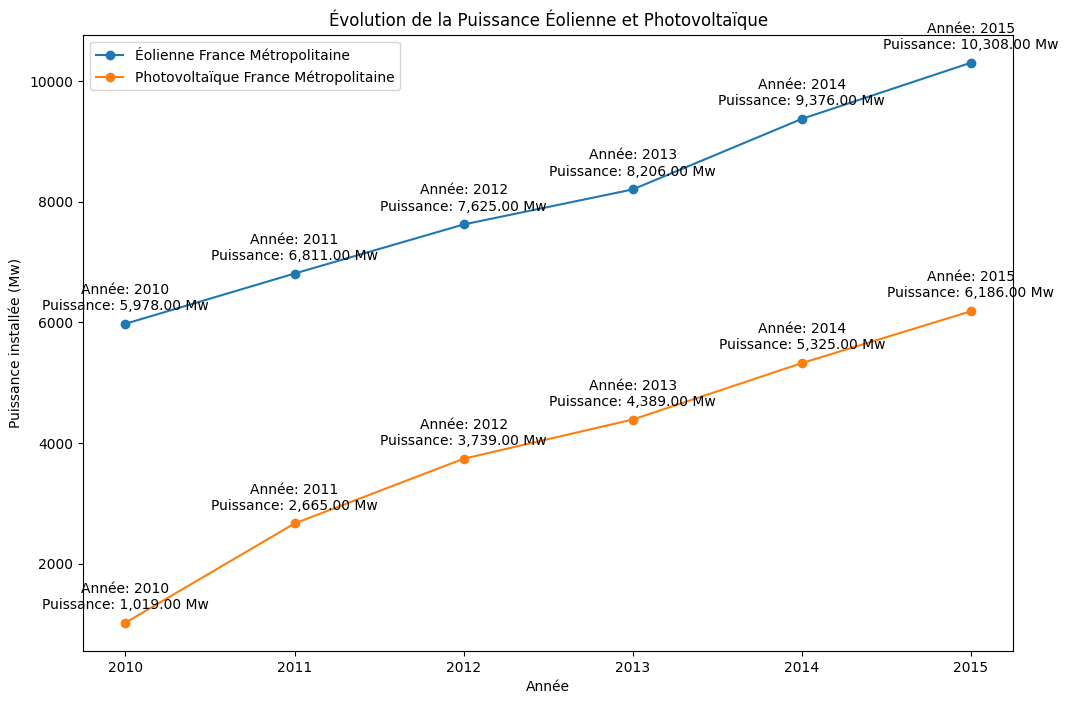

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

#DataFrame
dataframe1 = pd.read_excel('/kaggle/input/data23/energie.xlsx', index_col=0)

# Extraction données
eolienne_france = dataframe1.loc["puissance éolienne raccordée (Mw) en France Métropolitaine"]
photovoltaique_france = dataframe1.loc["puissance installée en photovoltaïque (Mw) en France Métropolitaine"]
 
# Plot
plt.figure(figsize=(12, 8))

# Tracer lignes
line_eolienne_france, = plt.plot(dataframe1.columns, eolienne_france, label='Éolienne France Métropolitaine', marker='o')
line_photovoltaique_france, = plt.plot(dataframe1.columns, photovoltaique_france, label='Photovoltaïque France Métropolitaine', marker='o')

# titres/légendes
plt.title('Évolution de la Puissance Éolienne et Photovoltaïque')
plt.xlabel('Année')
plt.ylabel('Puissance installée (Mw)')
plt.legend()

# Ajouter des annotations interactives
for line in [line_eolienne_france, line_photovoltaique_france]:
    for i, txt in enumerate(dataframe1.columns):
        plt.annotate(f'Année: {txt}\nPuissance: {line.get_ydata()[i]:,.2f} Mw',
                     (line.get_xdata()[i], line.get_ydata()[i]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center')

# graph
plt.show()



In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [32]:
data = pd.read_csv('/kaggle/input/datacarbon-intensity/carbon-intensity-electricity.csv')
print(data.head())

          Entity Code  Year  Carbon intensity of electricity (gCO2/kWh)
0  ASEAN (Ember)  NaN  2000                                   500.23060
1  ASEAN (Ember)  NaN  2001                                   499.35797
2  ASEAN (Ember)  NaN  2002                                   505.65250
3  ASEAN (Ember)  NaN  2003                                   513.69790
4  ASEAN (Ember)  NaN  2004                                   520.90980


In [33]:
data['Entity'].unique()


array(['ASEAN (Ember)', 'Afghanistan', 'Africa', 'Africa (Ember)',
       'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Asia (Ember)', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswati

In [ ]:
print ("nombre de pays dans la basse:",
       len(data['Entity'].unique()))

In [34]:
#filtrage des donnée pour une comparaison avec la france 
pays_comparaison = ['France', 'Germany','Italy', 'Sweden', 'India', 'China']

data_selectionne = data[data['Entity'].isin(pays_comparaison)][['Entity', 'Year', 'Carbon intensity of electricity (gCO2/kWh)']]

print(data_selectionne.head())


    Entity  Year  Carbon intensity of electricity (gCO2/kWh)
961  China  2000                                   672.36650
962  China  2001                                   654.88020
963  China  2002                                   663.27690
964  China  2003                                   677.91455
965  China  2004                                   667.89966


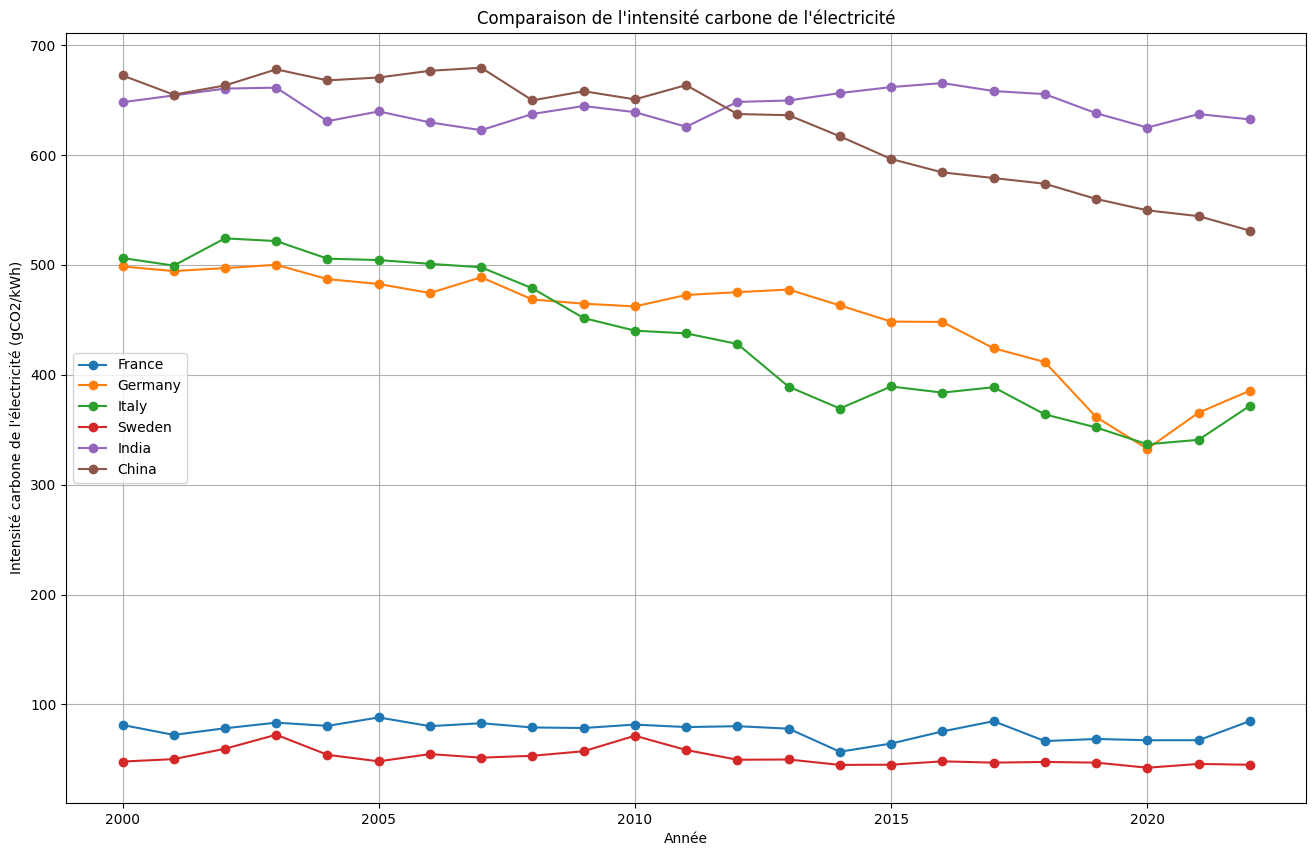

In [37]:
plt.figure(figsize=(16, 10))

for pays in pays_comparaison:
    data_pays = data_selectionne[data_selectionne['Entity'] == pays]
    plt.plot(data_pays['Year'], data_pays['Carbon intensity of electricity (gCO2/kWh)'],
             label=pays, marker='o')

plt.title('Comparaison de l\'intensité carbone de l\'électricité')
plt.xlabel('Année')
plt.ylabel('Intensité carbone de l\'électricité (gCO2/kWh)')
plt.legend()
plt.grid(True)
plt.show()



import pandas as pd

 
chemin_du_fichier = 'energie.xlsx'
chemin_du_fichier1 = 'deve-envir-conso-energie.xlsx'
dataframe = pd.read_excel(chemin_du_fichier1)
dataframe1 = pd.read_excel(chemin_du_fichier)

# Affichez le DataFrame33
#print(dataframe)
print(dataframe)
print(dataframe1)